In [43]:
# GHOST - Advection Test (1D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh1D
from Discretization import SpatialDiscretization
from Solver import Solver


# discretization order
p = 5

p_geo = 1

# set up periodic mesh
mesh = Mesh1D("mesh1d", 0.0, 1.0, 4)
left = [1.0, 0.0]
right = [1.0, 1.0]
mesh.add_bc_on_hyperplanes([left,right],[1,2])
mesh.make_periodic([1,2])

mesh.map_mesh(f_map=Mesh1D.grid_transformation(warp_factor=0.2), p_geo=p_geo)


# volume quadrature order
tau = 2*p+1

# solver parameters
params = {"project_title": "adv_test_1d",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.array([1.0]),
         "wave_speed": np.ones(1),
         "upwind_parameter": 1.0,
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "form": "weak",
         "solution_representation": "modal",
         "correction": "c_dg",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver_fr = Solver(params,mesh)

dt =  0.002277904328018223
writing every  439  time steps, total  439
writing time step  439 : t =  0.9999999999999991


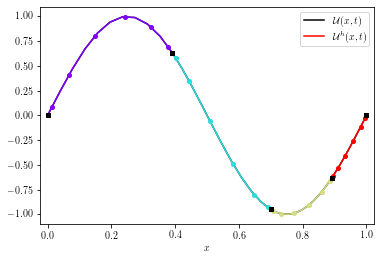

In [44]:
solver_fr.run()
solver_fr.post_process()
solver_fr.plot(plot_nodes=True, plot_exact=True)

In [45]:
solver_fr.calculate_error(norm="L2")

array([5.91583946e-05])

In [41]:
params = {"project_title": "adv_test_1d",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.array([1.0]),
         "wave_speed": np.ones(1),
         "upwind_parameter": 0.0,
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "form": "weak",
         "solution_representation": "modal",
         "correction": "c_dg",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver_dg = Solver(params,mesh)

dt =  0.002277904328018223
writing every  439  time steps, total  439
writing time step  439 : t =  0.9999999999999991


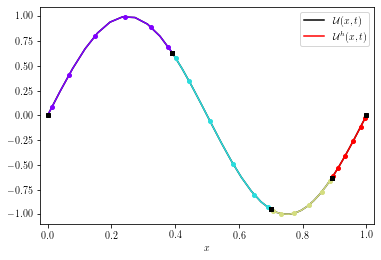

In [42]:
solver_dg.run()
solver_dg.post_process()
solver_dg.plot(plot_nodes=True, plot_exact=True)

In [25]:
solver_dg.calculate_error(norm="L2")

array([0.00572441])

In [29]:
D = solver_fr.discretization.Dhat[0][0]
Mtilde = solver_fr.discretization.M[0] + solver_fr.discretization.K[0]

In [34]:
M_gamma = solver_fr.discretization.V_gamma[0][1].T @ solver_fr.discretization.V_gamma[0][1] - solver_fr.discretization.V_gamma[0][0].T @ solver_fr.discretization.V_gamma[0][0]

In [36]:
M_gamma - Mtilde @ D + D.T @ Mtilde

array([[ 0.00000000e+00, -1.33226763e-15, -1.18073143e-16,
        -4.44089210e-15],
       [ 3.46410162e+00,  0.00000000e+00, -3.98416420e-15,
        -6.57819339e-16],
       [ 1.18073143e-16,  7.74596669e+00,  2.14993764e-16,
         2.90804986e-16],
       [ 5.29150262e+00,  2.33262805e-16,  1.18321596e+01,
         2.63641798e-16]])